# Insurance Analysis

# 1. Descriptive Statistics
1. Rata-rata umur pengguna
2. Rata-rata nilai BMI dari pengguna yang merokok
3. Berapa rata rata umur pada data tersebut?
4. Berapa rata rata nilai BMI dari yang merokok?
5. Apakah variansi dari data charges perokok dan non perokok sama?
6. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?
7. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?
8. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25
atau non perokok yang BMI nya diatas 25
9. BMI mana yang lebih tinggi, seseorang laki-laki atau perempuan?
10. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?


In [1]:
import pandas as pd
import numpy as np
from numpy import cov
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def load_data_insurance():
    data_insurance = pd.read_csv("insurance.csv")
    data_insurance = data_insurance.assign(bmi_category=pd.cut(data_insurance['bmi'], 
                               bins=[0, 25, 60], 
                               labels=['normal', 'over']))
    data_insurance = data_insurance.assign(charges_category=pd.cut(data_insurance['charges'], 
                               bins=[0, 16_700, 65_000], 
                               labels=['normal', 'high']))
    return data_insurance

In [3]:
data_insurance = load_data_insurance()
# data_insurance

In [4]:
# 3. Berapa rata rata umur pada data tersebut?

mean_age = data_insurance.agg({'age' : ['mean', 'median']})
print(mean_age)

              age
mean    39.207025
median  39.000000


In [5]:
# 4. Berapa rata rata nilai BMI dari yang merokok?

mean_by_smoker = data_insurance.groupby(['smoker']).mean()
mean_by_smoker['bmi']

smoker
no     30.651795
yes    30.708449
Name: bmi, dtype: float64

smoker
no      5993.781819
yes    11541.547176
Name: charges, dtype: float64
AxesSubplot(0.1,0.15;0.8x0.75)


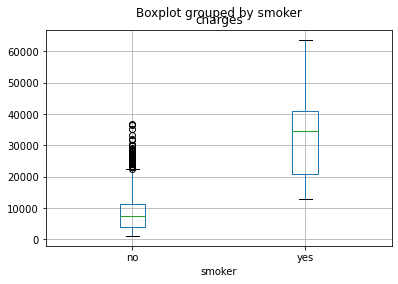

In [6]:
# 5. Apakah variansi dari data charges perokok dan non perokok sama

std_by_smoker = data_insurance.groupby(['smoker']).std()
print(std_by_smoker['charges'])

boxplot_charges_by_smoker = data_insurance.boxplot(column='charges', by='smoker')
print(boxplot_charges_by_smoker)

sex
female    38.608696
male      38.446541
Name: age, dtype: float64
AxesSubplot(0.1,0.15;0.8x0.75)


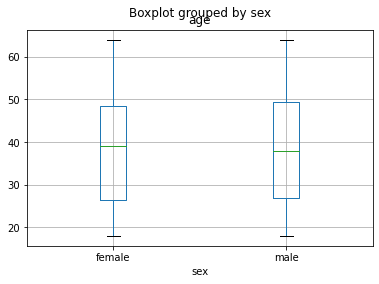

In [7]:
# 6. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

mean_of_smoker = data_insurance.query('smoker == "yes"').groupby(['sex']).mean()
print(mean_of_smoker['age'])

# tabel_mean = data_insurance.groupby(['smoker', 'sex']).mean()
# print(tabel_mean['age'])

boxplot_smoker_age_by_sex = data_insurance.query('smoker == "yes"').boxplot(column='age', by='sex')
print(boxplot_smoker_age_by_sex)

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64
AxesSubplot(0.1,0.15;0.8x0.75)


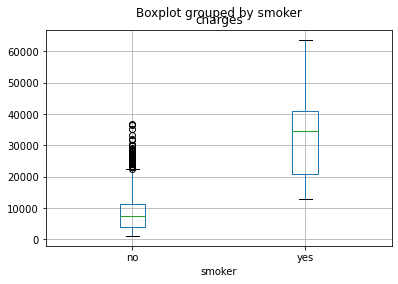

In [8]:
# 7. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

print(mean_by_smoker['charges'])

boxplot_charges_by_smoker = data_insurance.boxplot(column='charges', by='smoker')
print(boxplot_charges_by_smoker)

smoker
no      8629.589610
yes    35116.909657
Name: charges, dtype: float64
AxesSubplot(0.1,0.15;0.8x0.75)


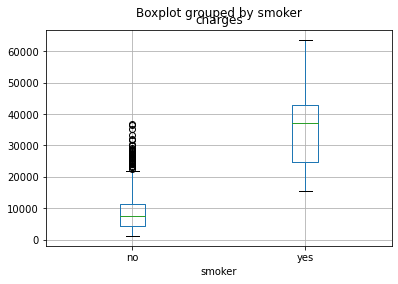

In [9]:
# 8. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25?

mean_of_bmi_over = data_insurance.query('bmi_category == "over"').groupby(['smoker']).mean()
print(mean_of_bmi_over['charges'])

boxplot_charges_of_bmi_over = data_insurance.query('bmi_category == "over"').boxplot(column='charges', by='smoker')
print(boxplot_charges_of_bmi_over)

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64
AxesSubplot(0.1,0.15;0.8x0.75)


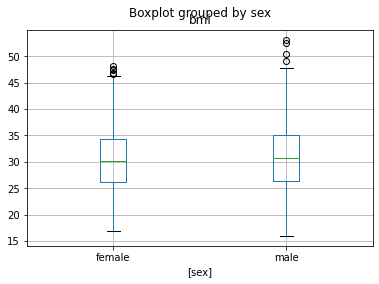

In [10]:
# 9. BMI mana yang lebih tinggi, seseorang laki-laki atau perempuan?

mean_bmi_by_sex = (data_insurance.groupby(['sex']).mean())['bmi']
print(mean_bmi_by_sex)

boxplot_bmi_by_sex = data_insurance.boxplot(column='bmi', by=['sex'])
print(boxplot_bmi_by_sex)

smoker
no     30.651795
yes    30.708449
Name: bmi, dtype: float64
AxesSubplot(0.1,0.15;0.8x0.75)


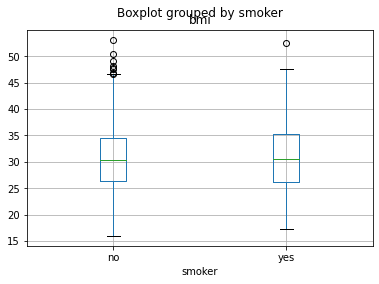

In [11]:
# 10. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

print(mean_by_smoker['bmi'])

boxplot_bmi_by_smoker = data_insurance.boxplot(column='bmi', by='smoker')
print(boxplot_bmi_by_smoker)